### Optimization

Finding an intelligent way to adjust the neurons weights and biases to minimize loss is the main difficulty in neural networks.

## The impact of a parameter on the output

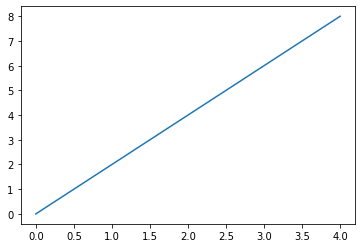

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)

plt.plot(x, y)
plt.show()

Slope of the line: $\frac{\Delta y}{\Delta x}$

In this case slope of $y = 2x$ is 2

What about for a non-linear function $f = 2x^2$?

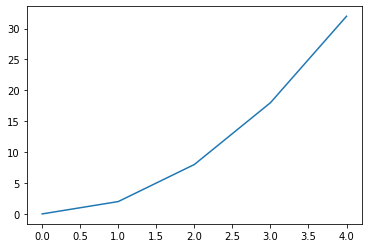

In [3]:
def f(x):
    return 2*x**2

y = f(x)
plt.plot(x, y)
plt.show()

This will result in different slopes at each point on the curve. Instead we want to use a **tangent** line, giving us the **instantaneous slope**. This is the result of the deriviative. We can use two infinitely close points and calculate the slope to get the derivative. This is called **numerical differentiation**. Making the points as close as possible (while preventing a divide by 0 scenario) gives us the most correct tangent line.

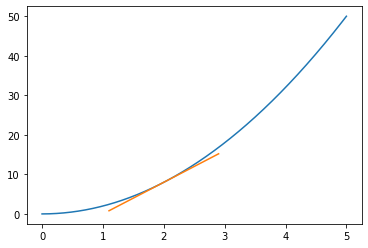

In [6]:
x = np.arange(0, 5, 0.001)
y = f(x)
plt.plot(x, y)

# lets compute the approx derivative of the function y = 2x^2
p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

approximate_derivative = (y2-y1)/(x2-x1)
b = y2 - approximate_derivative*x2

# we can compute a tangent line by using y = mx + b
def tangent_line(x):
    return approximate_derivative * x + b

# lets plot the tangent lines
to_plot = [x1-0.9, x1, x1+0.9]
plt.plot(to_plot, [tangent_line(i) for i in to_plot])

# show the plot of the approx tanget at x = 2
plt.show()

We care about the slope of the tangent line because it gives us an **instantaneous rate of change** that tells us about the impact that x has on the function. We can use this to determine the effect a specific weight or biases has on the loss function given a sample.

(0, 0) (0.0001, 2e-08)
(1, 2) (1.0001, 2.00040002)
(2, 8) (2.0001, 8.000800020000002)
(3, 18) (3.0001, 18.001200020000002)
(4, 32) (4.0001, 32.00160002)


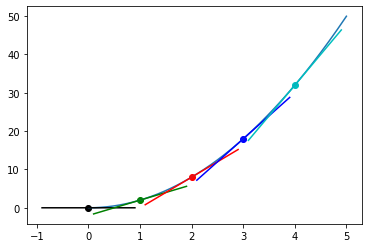

In [7]:
x = np.array(np.arange(0, 5, 0.001))
y = f(x)
plt.plot(x, y)
colors = ['k', 'g', 'r', 'b', 'c']
    
def approximate_tangent_line(x, approximate_derivative): 
    return (approximate_derivative*x) + b

for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1+p2_delta
    y1 = f(x1)
    y2 = f(x2)
    print((x1, y1), (x2, y2))
    approximate_derivative = (y2-y1)/(x2-x1)
    b = y2-(approximate_derivative*x2)
    to_plot = [x1-0.9, x1, x1+0.9]
    plt.scatter(x1, y1, c=colors[i]) 
    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point, approximate_derivative) for point in to_plot],
             c=colors[i])
plt.show()

Since we have to repeat the derivative computation for each weight and bias for every sample, this will be a slow process. This is essentially brute forcing the derivative calculation.

## The analytical derivative

Analytical methods offer exact and quicker solutions, but identifying the analytical solution can vary in complexity.

### Gradients

The **gradient** is a vector composed of all of the partial derivatives of a function, calculated with respect to each of the input variables. It is denoted with the $\nabla$ symbol